<a href="https://colab.research.google.com/github/KoffiXVI/Deeplife-/blob/main/Week_01/Deep4Life_Lab_1_Introduction_to_pytorch_noSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Making sure you can run PyTorch code**

In our first practical session, we will learn the basics of how to train, test and use simple multilayered perceptron networks.

But first we need to verify that we are able to run pyTorch code. you can execute the code blocks as the one below by clicking shift+Enter


In [97]:
if 'google.colab' in str(get_ipython()):
  print('Running in Google colab, no need to install libraries')
else:
  print('Download the requirements.txt file from the course Web site in order to automatically install required libraries on a local machine via pip')

Running in Google colab, no need to install libraries


If you ran the above code snippet, you should see that you are either in google colab, or in some other environment.

In [98]:
import torch

print(f'pytorch version: {torch.__version__}')

num_gpu = torch.cuda.device_count()
print(f'{num_gpu} GPU available')

pytorch version: 2.9.0+cu126
1 GPU available


If the above code has printed 0 GPU available, please make sure you switched to the T4 GPU capable runtime (top right corner of the page), or else, the exercises will be very slow...

Once you are running a runtime with GPU, you can also run a shell command nvidia-smi, to check on the status of your GPU

In [99]:
!nvidia-smi


Fri Jan 30 15:31:00 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Example 1 - Simple linear regression task

Now that everything is up a running, let us check one of the simplest tasks, a neural network can perform - a linear regression. I.e. we will generate some data that will correspond to an approximate linear function and we will try to train a model that realizes this function.

First, let us generate some data.

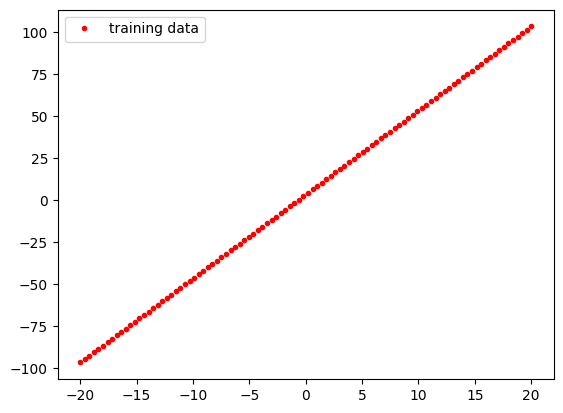

In [100]:
import matplotlib.pyplot as plt
import numpy as np

Xs = np.linspace(-20,20,100) # we start with a hundered X values between -20 and 20

Ys=Xs*5+3.5 # as our Xs are a numpy array, we can perform simple arithmetic on each element of Xs

#Now, we can plot the data we generated

plt.plot(Xs,Ys,"r.",label="training data")
plt.legend()

Now we need to define the model. We will go with a very simple network, with one input, one output, and a hidden layer with 4 neurons.



In [101]:

import torch.nn as nn

#we set the parameters of our simple network architecture
N_input=1
N_hidden=4
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((100,1)), dtype=torch.float32)


Now that we have the data and the model, we need to specify the optimizer and a loss function. As this is a regression task, we will use the MSE (MeanSquareError) loss function and a simple SGD(stochastic gradient descent optimizer).

In [102]:
criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Stochastic Gradient Descent in this case)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) # lr is the learning rate


Finally, we need to set up the main training loop.

In [103]:
N_epochs=3000
loss_vals=[]
# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 100 == 0:
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  3189.755615234375
epoch:  100  loss:  6.357057094573975
epoch:  200  loss:  4.830285549163818
epoch:  300  loss:  3.6576788425445557
epoch:  400  loss:  2.759028911590576
epoch:  500  loss:  2.0727269649505615
epoch:  600  loss:  1.5508010387420654
epoch:  700  loss:  1.1557023525238037
epoch:  800  loss:  0.8580371141433716
epoch:  900  loss:  0.6348137259483337
epoch:  1000  loss:  0.4681587517261505
epoch:  1100  loss:  0.344252347946167
epoch:  1200  loss:  0.2524825930595398
epoch:  1300  loss:  0.18474557995796204
epoch:  1400  loss:  0.13490699231624603
epoch:  1500  loss:  0.09833569824695587
epoch:  1600  loss:  0.07156529277563095
epoch:  1700  loss:  0.05201217159628868
epoch:  1800  loss:  0.037757162004709244
epoch:  1900  loss:  0.02738087624311447
epoch:  2000  loss:  0.019838865846395493
epoch:  2100  loss:  0.014363417401909828
epoch:  2200  loss:  0.010391971096396446
epoch:  2300  loss:  0.007514899596571922
epoch:  2400  loss:  0.005431977566331625

After training, we can also plot the evolution of the loss function value over the training period

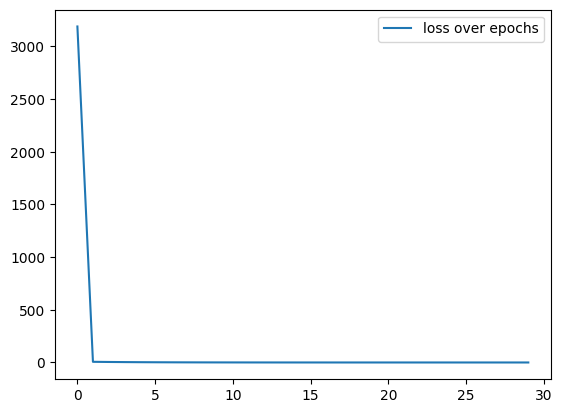

In [104]:
plt.plot(loss_vals,label="loss over epochs")
plt.legend()

As we can see, the first step is the most helpful, but actually, there is more happening than meets the eye in this plot, we just need to explore it in more detail by changing the y-axis range

(-0.5, 15.0)

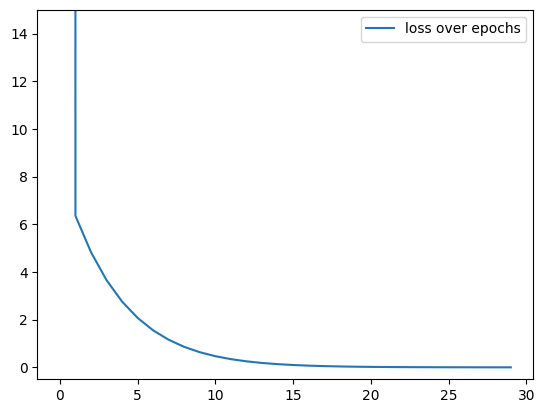

In [105]:
plt.plot(loss_vals,label="loss over epochs")
plt.legend()
plt.ylim(-.5,15)


Now that we have trained our model, we can see how it can be used on some new testing data. We will generate a few points inside the interval that the network was trained on and a few samples outside, to see if the network generalizes.

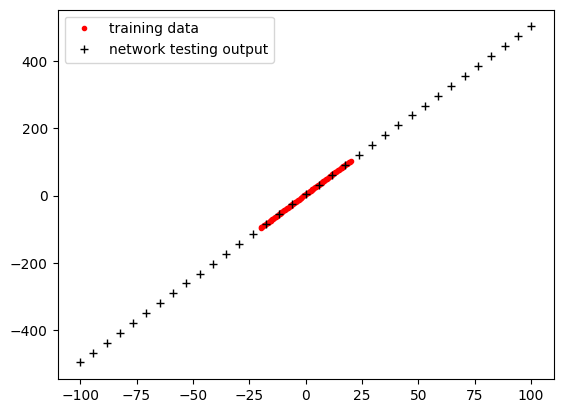

In [106]:
test_Xs= np.linspace(-100,100,35)
test_Ys=test_Xs*5+3.5

with torch.no_grad(): # turning off the autograd of PyTorch
    test_data = torch.tensor(test_Xs.reshape((35,1)), dtype=torch.float32)
    test_output = model(test_data)

#plot the results
plt.plot(Xs,Ys,"r.",label="training data")
plt.plot(test_Xs,test_output,"k+",label="network testing output")
plt.legend()

As we can see, the model is generalizing properly from the training data we have provided it with.


# Example 2 - non-linear function of 2 arguments

Now that we have the first working neural network model, we can move to something a little more realistic. A non-linear function of two arguments. Let's try with:

Y = x2 ** 2 * 5 - x1 * 3 + 15

torch.Size([2500, 2])

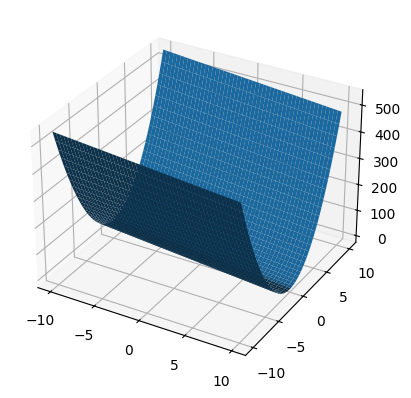

In [107]:
Xs1 = np.linspace(-10,10,50)
Xs2 = np.linspace(-10,10,50)

Xs1,Xs2 = np.meshgrid(Xs1,Xs2) # generate all possible pairs of x1 and x2

Ys = (Xs2**2*5)-(Xs1*3) + 15

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys, vmin=Ys.min() * 2)

#preparing torch tensors for learning

inputs = torch.tensor(np.concatenate((Xs1.reshape((2500,1)),Xs2.reshape((2500,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((2500,1)), dtype=torch.float32)

inputs.shape
#targets.shape

This function is non-linear and has multiple arguments, let us create a model with non-linear activation function (We'll use ReLU for that), two hidden layers instead of one and we will use Adam optimizer to speed up the process.

In [108]:
#model definition
N_input=2
N_hidden=25
N_output=1

#we will now have more hidden layers and more neurons in each of them

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),                       # we need non-linear activation functions
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
    nn.ReLU()
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Again, a very similar training loop, with just a bit more iterations:

In [109]:

N_epochs=50000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 2000 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  59876.3125
epoch:  2000  loss:  175.2520751953125
epoch:  4000  loss:  7.205581188201904
epoch:  6000  loss:  3.702003240585327
epoch:  8000  loss:  2.6284139156341553
epoch:  10000  loss:  2.384169101715088
epoch:  12000  loss:  2.328428030014038
epoch:  14000  loss:  2.1774072647094727
epoch:  16000  loss:  2.1247801780700684
epoch:  18000  loss:  2.0729401111602783
epoch:  20000  loss:  2.013930559158325
epoch:  22000  loss:  1.9723265171051025
epoch:  24000  loss:  1.9531816244125366
epoch:  26000  loss:  1.922261357307434
epoch:  28000  loss:  1.9417868852615356
epoch:  30000  loss:  1.9083261489868164
epoch:  32000  loss:  1.8816964626312256
epoch:  34000  loss:  1.8792657852172852
epoch:  36000  loss:  1.874009609222412
epoch:  38000  loss:  1.8786660432815552
epoch:  40000  loss:  1.8754576444625854
epoch:  42000  loss:  1.877455711364746
epoch:  44000  loss:  1.905763030052185
epoch:  46000  loss:  1.8766249418258667
epoch:  48000  loss:  1.886642336845398


The optimizer learns very fast the first few steps and then slows down. Again we can plot the loss function improvement over *time*

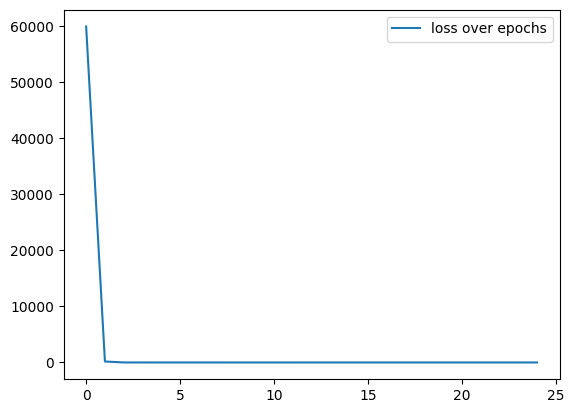

In [110]:
    plt.plot(range(len(loss_vals)),loss_vals,label="loss over epochs")
    plt.legend()

Again, we need to test if the function we have learned is generalizing beyond the training range:

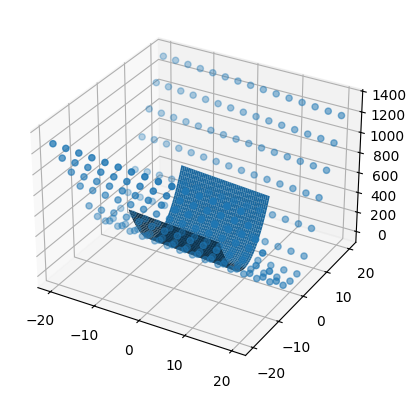

In [111]:
test_Xs1 = np.linspace(-20,20,15)
test_Xs2 = np.linspace(-20,20,15)

test_Xs1,test_Xs2 = np.meshgrid(test_Xs1,test_Xs2)

with torch.no_grad():
    test_data = torch.tensor(np.concatenate((test_Xs1.reshape((225,1)),test_Xs2.reshape((225,1))),axis=1), dtype=torch.float32)
    test_output = model(test_data)

test_mesh_output=test_output.reshape((15,15))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys,label="training data")
ax.scatter(test_Xs1,test_Xs2,test_mesh_output,label="testing data")



We have now seen two examples, where it was relatively easy for pytorch to fit the training data and generalize beyond it in the expected manner. Let us now see some situations, where this might not be so easy.

# Example 3 - XOR-like function


Let us first see how the underfitting looks like, based on the famous example of a non linear function similar to XOR. Let us consider a python function


```
def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
```

Can we train a single perceptron to learn it? This time, we will use some random data points instead of the regular mesh.

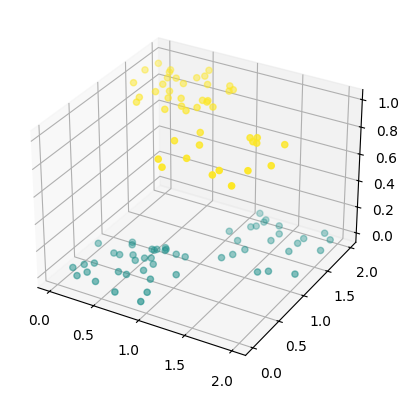

In [112]:
# let us start with some random X1,X2 point pairs from 0,2 interval
N_samples=100
train_X1s=np.random.rand(N_samples)*2
train_X2s=np.random.rand(N_samples)*2

def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
train_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(train_X1s,train_X2s)])

#prepare input and output data
inputs = torch.tensor(np.concatenate((train_X1s.reshape((N_samples,1)),train_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(train_Ys.reshape((N_samples,1)), dtype=torch.float32)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",vmin=-1,c=train_Ys) #data is colored by the Y value


As we have heard in the lecture, this function should be difficult for a simple 1-layer perceptron model. Let us test if this indeed is true. First we need to define the model:

In [113]:

#model definition
N_input=2
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_output),
    nn.ReLU(),                       # we need non-linear activation functions
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Once we have the model, we can try and train it:

In [114]:
N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  0.403804749250412
epoch:  500  loss:  0.27799180150032043
epoch:  1000  loss:  0.2639623284339905
epoch:  1500  loss:  0.2612902522087097
epoch:  2000  loss:  0.26087328791618347
epoch:  2500  loss:  0.2608487010002136
epoch:  3000  loss:  0.26084819436073303
epoch:  3500  loss:  0.26084819436073303
epoch:  4000  loss:  0.2608482241630554
epoch:  4500  loss:  0.2608482539653778


The loss function gets lower, but never quite reaches 0. let us see if this is indeed a problem or not.

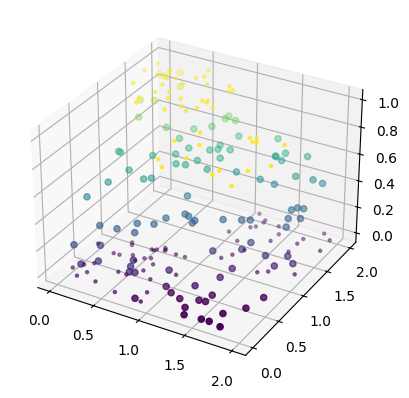

In [115]:
N_samples=100
test_X1s=np.random.rand(N_samples)*2
test_X2s=np.random.rand(N_samples)*2

test_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(test_X1s,test_X2s)])

#prepare test input  data
test_inputs = torch.tensor(np.concatenate((test_X1s.reshape((N_samples,1)),test_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)

with torch.no_grad():
    test_output = model(test_inputs)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output.detach().numpy().flatten(),label="testing data",c=test_output.detach().numpy().flatten(),marker="o")


We can see that the model is definitely not a good fit to the data.

Can we do better?
**Exercise 1**

Can you fill in the missing parts of the code so that we have a two-layer neural network that is able to fit the data?

epoch:  0  loss:  0.2689618170261383
epoch:  1000  loss:  0.06280621886253357
epoch:  2000  loss:  0.03194570168852806
epoch:  3000  loss:  0.020604591816663742
epoch:  4000  loss:  0.0142665458843112
epoch:  5000  loss:  0.009803060442209244
epoch:  6000  loss:  0.007238436955958605
epoch:  7000  loss:  0.0056453887373209
epoch:  8000  loss:  0.004455027636140585
epoch:  9000  loss:  0.0036729155108332634
epoch:  10000  loss:  0.0032284162007272243
epoch:  11000  loss:  0.0029451323207467794
epoch:  12000  loss:  0.0027558165602385998
epoch:  13000  loss:  0.0025822881143540144
epoch:  14000  loss:  0.0024455622769892216


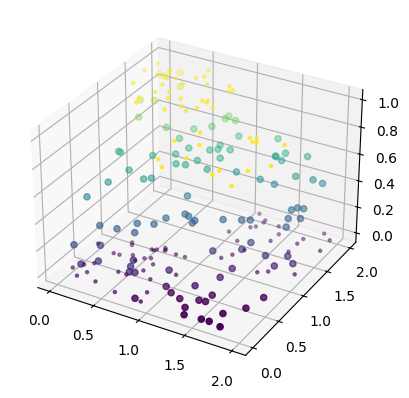

In [116]:

#model definition
N_input=2
N_hidden=20
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
    nn.ReLU()
                        # HERE WE NEED A NETWORK WITH A HIDDEN LAYER
                        # AND A NON-LINEAR ACTIVATION - e.g. ReLU
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=15000
loss_vals=[]

 #HERE WE NEED TO PUT THE TRAINING/TESTING LOOP
 # Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 1000 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output.detach().numpy().flatten(),label="testing data",c=test_output.detach().numpy().flatten(),marker="o")


# Example 4 - Overfitting by undersampling

Let us consider another common issue - overfitting caused by the training set not being representative of the larger testing set.

Let us consider A cosine function:

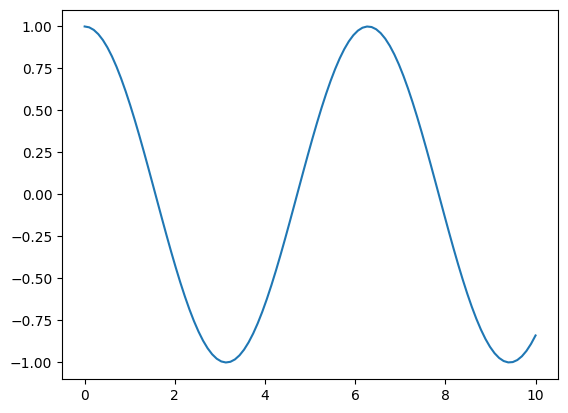

In [117]:
cos_Xs=np.linspace(0,10,100)
cos_Ys=np.cos(cos_Xs)
plt.plot(cos_Xs,cos_Ys)

If we prepare the training data from an interval that is too small, e.g. <0,3>

In [118]:
train_cos_Xs=np.random.rand(100)*3
train_cos_Ys=np.cos(train_cos_Xs)


#we set the parameters of our simple network architecture
N_input=1
N_hidden=15
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((100,1)), dtype=torch.float32)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  0.40603601932525635
epoch:  500  loss:  0.001470994669944048
epoch:  1000  loss:  0.001084559946320951
epoch:  1500  loss:  0.0008783358498476446
epoch:  2000  loss:  0.0007412926061078906
epoch:  2500  loss:  0.000600408180616796
epoch:  3000  loss:  0.00047009624540805817
epoch:  3500  loss:  0.00034348308690823615
epoch:  4000  loss:  0.00024448317708447576
epoch:  4500  loss:  0.00017158153059426695


The training seems to go well, but the function we have learned is notexactly a cosine function...

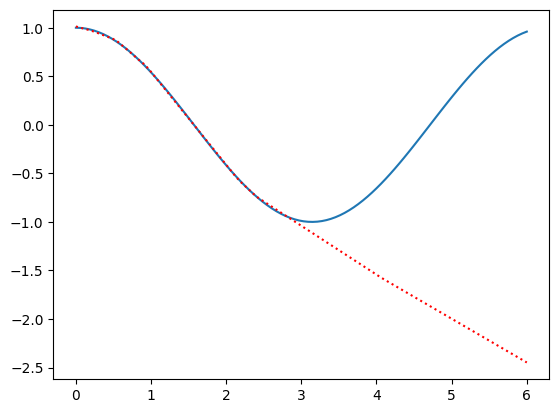

In [119]:
val_cos_Xs=np.linspace(0,6,100)
val_cos_Ys=np.cos(val_cos_Xs)
plt.plot(val_cos_Xs,val_cos_Ys)
val_inputs=torch.tensor(val_cos_Xs.reshape((100,1)), dtype=torch.float32)
with torch.no_grad():
    val_output = model(val_inputs)
plt.plot(val_cos_Xs,val_output,"r:")

Indeed, we have fitted the part of the cosine function from 0 to 3 fairly well, but then the cosine function behaves differently...

This is why we want to use a validation dataset to aid us in seeing the overfitting when it happens. Let us combine the two pieces of code together:


epoch:  0  loss:  1.3355265855789185 validation loss:  5.487614154815674
epoch:  500  loss:  0.0017729777609929442 validation loss:  2.6616976261138916
epoch:  1000  loss:  0.0006830425700172782 validation loss:  2.7043237686157227
epoch:  1500  loss:  0.00031807561754249036 validation loss:  2.6775171756744385
epoch:  2000  loss:  0.00020481616957113147 validation loss:  2.60575532913208
epoch:  2500  loss:  0.00015344936400651932 validation loss:  2.512939929962158
epoch:  3000  loss:  0.00011407687998143956 validation loss:  2.41264009475708
epoch:  3500  loss:  8.185461047105491e-05 validation loss:  2.3085954189300537
epoch:  4000  loss:  5.639790470013395e-05 validation loss:  2.2013022899627686
epoch:  4500  loss:  3.6839963286183774e-05 validation loss:  2.0933244228363037


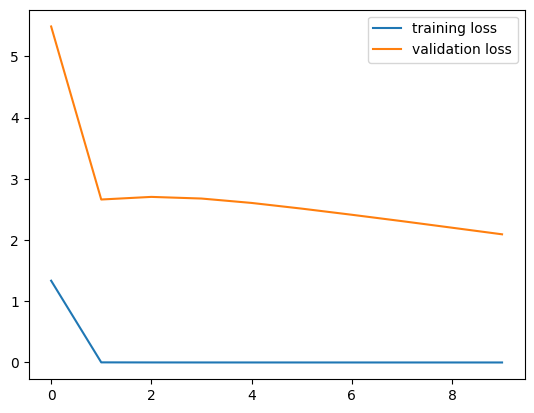

In [120]:
# we create the training data
train_cos_Xs=np.random.rand(200)*3
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

Clearly, while the training error seems to go down with training, but it is not the case for the validation error indicating that we have a severe overfitting issue.

**Exercise 2**

Can you modify the above code snippet, so that the model is fitting the data properly? Hint: we need to make sure that the training data is sampled from the range similar to the validation data...

epoch:  0  loss:  0.6754777431488037 validation loss:  0.8437315821647644
epoch:  500  loss:  0.04048757255077362 validation loss:  0.050589051097631454
epoch:  1000  loss:  0.0037898195441812277 validation loss:  0.004641409497708082
epoch:  1500  loss:  0.001216601231135428 validation loss:  0.0016414424171671271
epoch:  2000  loss:  0.0008190370863303542 validation loss:  0.001159066567197442
epoch:  2500  loss:  0.0007836949080228806 validation loss:  0.0011164324823766947
epoch:  3000  loss:  0.0007640972035005689 validation loss:  0.0010961230145767331
epoch:  3500  loss:  0.0007496057660318911 validation loss:  0.0010829794919118285
epoch:  4000  loss:  0.000742404954507947 validation loss:  0.0010772178648039699
epoch:  4500  loss:  0.0007393946289084852 validation loss:  0.0010757517302408814


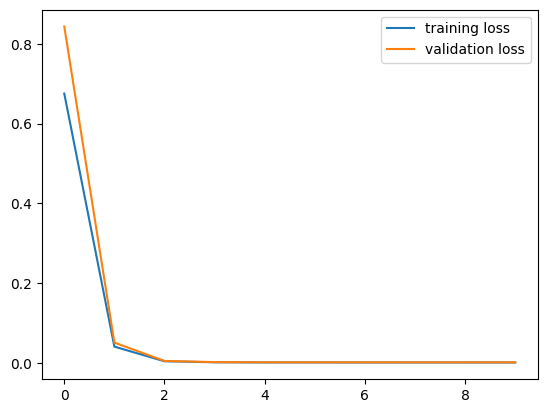

In [121]:
# we create the training data
train_cos_Xs=np.random.rand(200)*6
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

# Example 5 - overfitting noise with large capacity network

Let us consider a relatively simple function: y=x**2-5, but now add a little noise to the samples, and let us assume that the data is expensive to generate, so we will have relatively few datapoints.

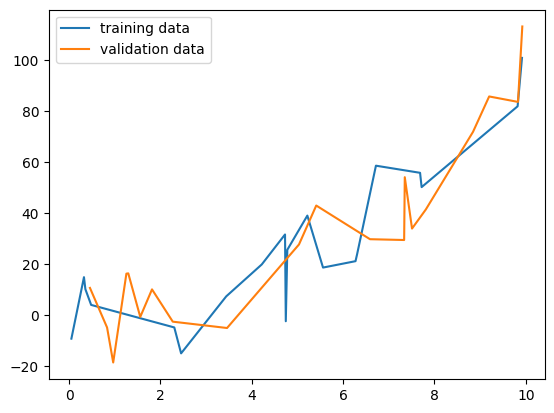

In [122]:
# we create the training data
train_noisy_Xs=np.random.rand(20)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(20)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(20)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(20)*40-20

#plot what is generated

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((20,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((20,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((20,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((20,1)), dtype=torch.float32)


Now, since we have so few datapoints, we feel that we need to compensate for what we lack in the data department by having a more complex computational model. Let us for a moment accept that this might be a good idea...

In [123]:

#we set the parameters of our relatively complex network architecture
N_input=1
N_hidden=500
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())


epoch:  0  loss:  1587.345458984375 validation loss:  1875.7923583984375
epoch:  1000  loss:  90.53204345703125 validation loss:  178.10311889648438
epoch:  2000  loss:  87.34172058105469 validation loss:  170.95852661132812
epoch:  3000  loss:  87.28337097167969 validation loss:  171.2638702392578
epoch:  4000  loss:  86.96707916259766 validation loss:  168.43585205078125
epoch:  5000  loss:  86.71913146972656 validation loss:  169.38424682617188
epoch:  6000  loss:  86.46463775634766 validation loss:  167.0628204345703
epoch:  7000  loss:  86.22393798828125 validation loss:  165.55117797851562
epoch:  8000  loss:  85.98921203613281 validation loss:  163.00814819335938
epoch:  9000  loss:  87.24434661865234 validation loss:  166.2874298095703


Clearly, there is some overfitting going on, but is it a different kind of overfitting? Let us do some plotting:

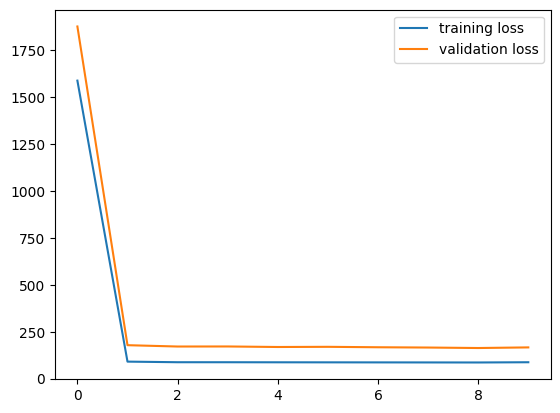

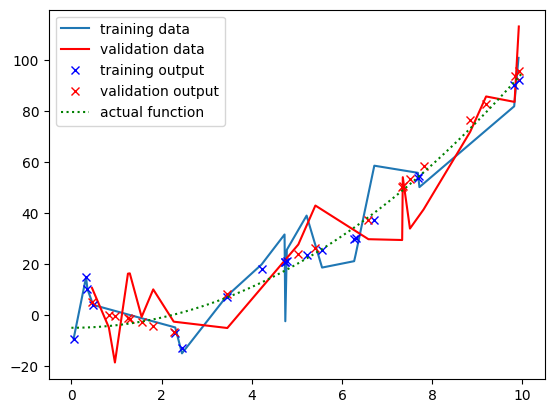

In [124]:
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"r-",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g:",label="actual function")
plt.legend()

Indeed, we have fitted the training data fairly well, but the presence of noise in the data (both training and validation), we can see that the model fits the blue curve better than we want it to (closer to the blue curve than to the green dots). It can be argued that this is indeed undersampling as well as in the previous example - we don't have enough data to generalize well.

In order tro fix that, we should have a relatively simpler model and train it on much more data.

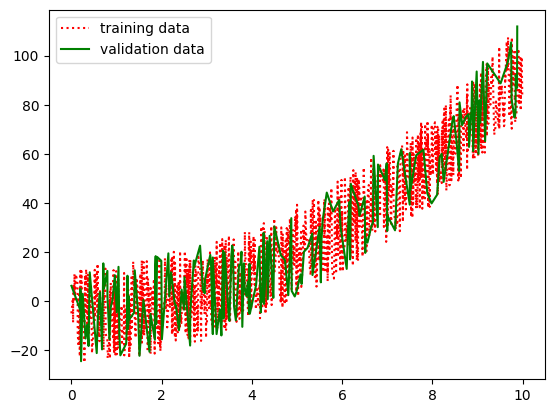

In [125]:
#let us createlarger training data
train_noisy_Xs=np.random.rand(1000)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(1000)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(200)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(200)*40-20

#plot what is generated

plt.plot(train_noisy_Xs,train_noisy_Ys,"r:",label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"g-",label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((1000,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((1000,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((200,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((200,1)), dtype=torch.float32)

**Exercise 3** can you now use this data to train a simpler network (just one hidden layer with 50 neurons on this data? Does it solve the problem?

epoch:  0  loss:  1765.78076171875 validation loss:  1519.763916015625
epoch:  1000  loss:  119.30133056640625 validation loss:  143.2882080078125
epoch:  2000  loss:  118.58079528808594 validation loss:  142.11151123046875
epoch:  3000  loss:  118.36038208007812 validation loss:  141.68304443359375
epoch:  4000  loss:  118.29527282714844 validation loss:  141.67364501953125
epoch:  5000  loss:  118.23890686035156 validation loss:  141.73875427246094
epoch:  6000  loss:  118.10480499267578 validation loss:  141.65843200683594
epoch:  7000  loss:  118.01416778564453 validation loss:  141.81326293945312
epoch:  8000  loss:  117.93985748291016 validation loss:  141.84153747558594
epoch:  9000  loss:  117.83834838867188 validation loss:  141.91177368164062


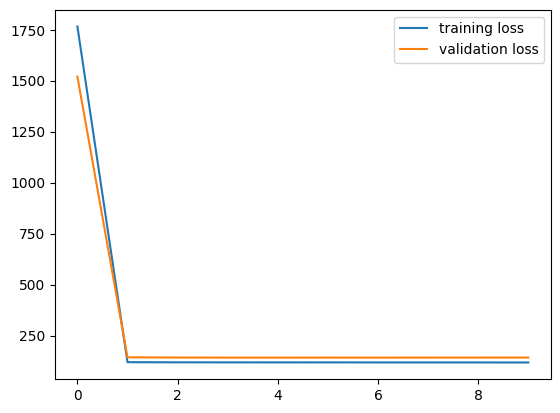

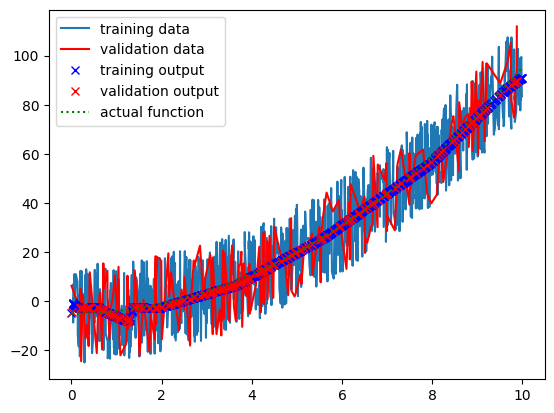

In [126]:
#we set the parameters of our relatively complex network architecture
N_input=1
N_hidden=50
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output)
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"r-",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g:",label="actual function")
plt.legend()

Even though the Loss value remains non-zero throughout the training, this is expected, as there is now noise in the training and validation data. Nonetheless, the fit to the data is relatively good.  

# Assignments for homework

As different groups at different Universities will use different scoring criteria, this might be completely optional for some of you and compulsory for some of you. It might or might not contribute to your grade. **Please consult with your instructors**

Homework assignments:

1.   Please take a look at the [PyTorch beginner tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). We did not use the dataset and dataloader API, but this should not stop you. Choose one of the examples from today's lecture and extend it so that it uses datasets and dataloaders
2.   One more thing that you might want to consider is re-writing the training loops to use the dataloaders and minibatches as in the [pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)
